In [89]:
!pip install scikit-learn

You should consider upgrading via the 'c:\python\python36\python.exe -m pip install --upgrade pip' command.


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate
import seaborn as sns


In [91]:
df_raw = pd.read_csv("./data/house_data.csv")

In [92]:
df_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [93]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [94]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [95]:
def function_to_pair_plot(df):
    plt.figure(dpi=120)
    sns.pairplot(df)
    plt.show()

In [96]:
df = df_raw.loc[ : , df_raw.columns != 'Price']
df_sample = df.sample(n = 10000)

In [119]:
df_sample_full = df_raw.sample(n = 10000)

<Figure size 720x480 with 0 Axes>

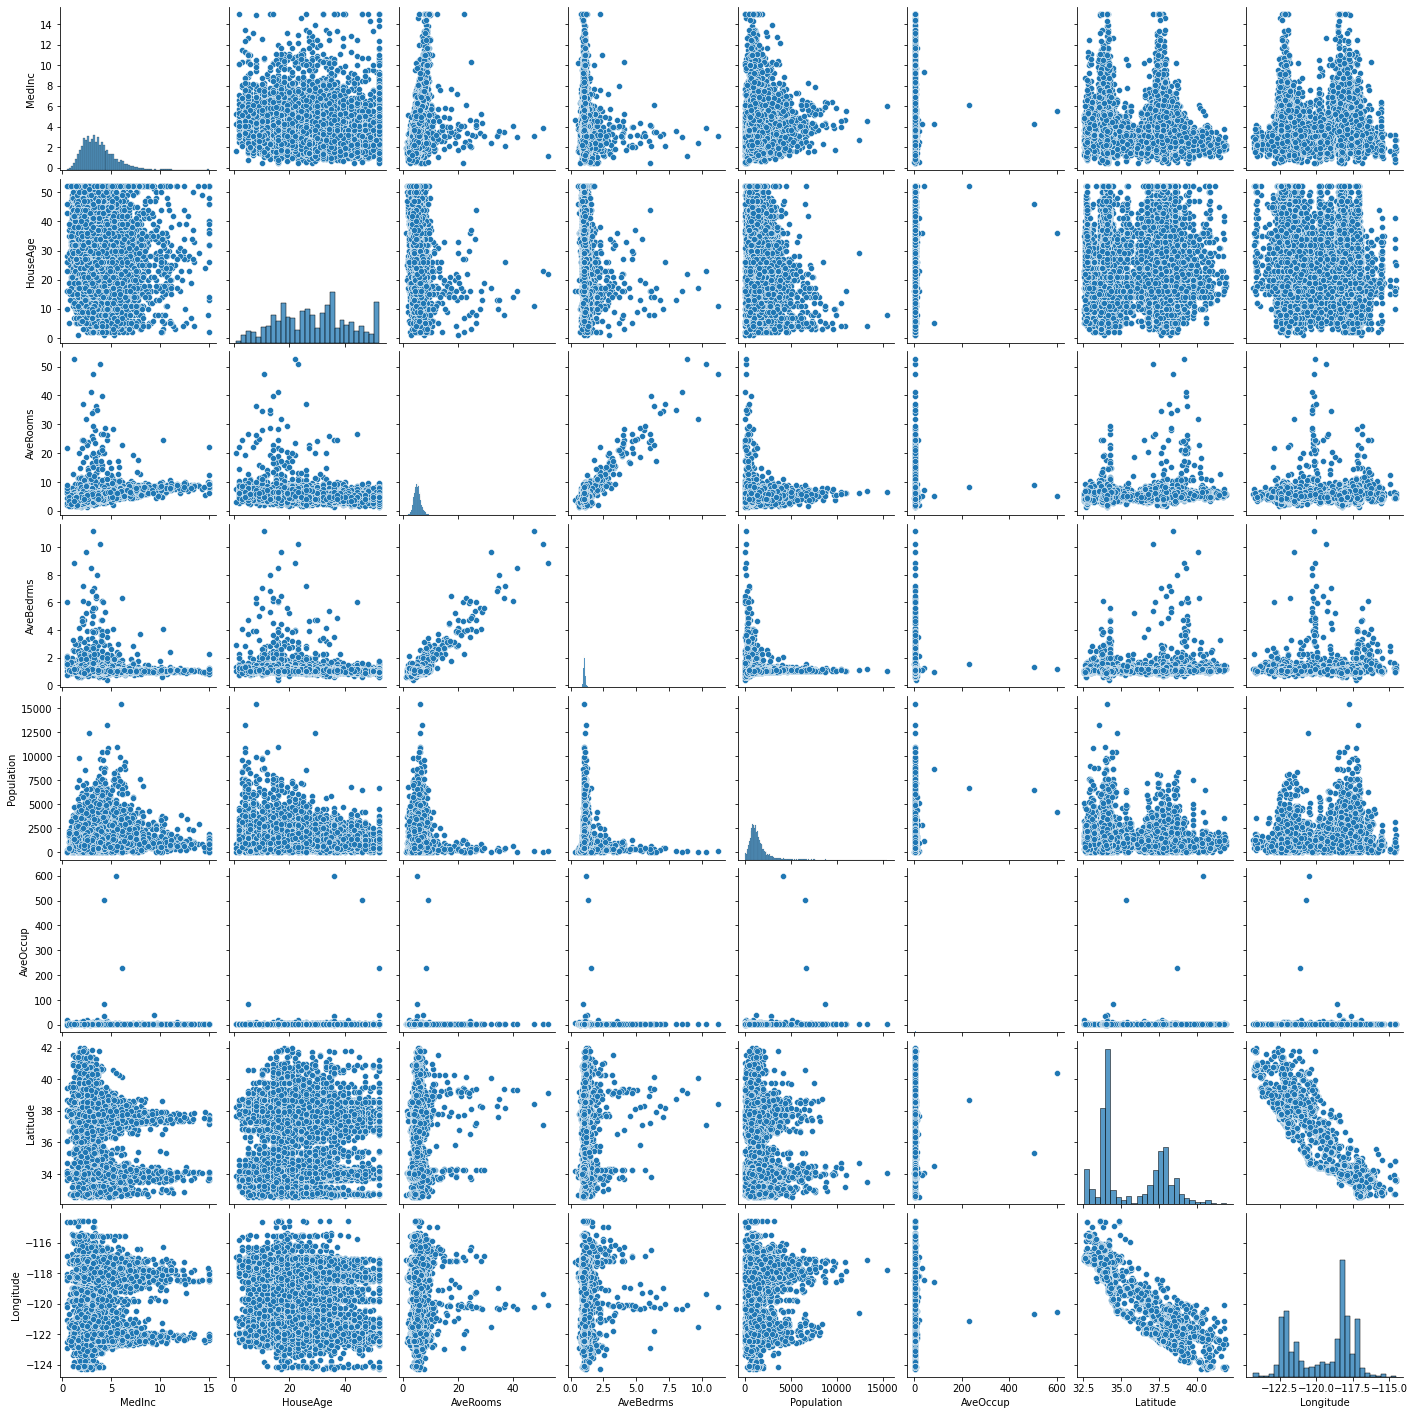

In [98]:
function_to_pair_plot(df_sample)

Average bedroom and Average room seem covariated with each other (positively)

There are some outliers with avg room, avg bedroom, avg occuppation. 

Long and Lat are covariated with each other (negatively)

In [99]:
def function_to_pair_plot_kde(df):
    plt.figure(dpi=120)
    sns.pairplot(df, diag_kind="kde")
    plt.show()

<Figure size 720x480 with 0 Axes>

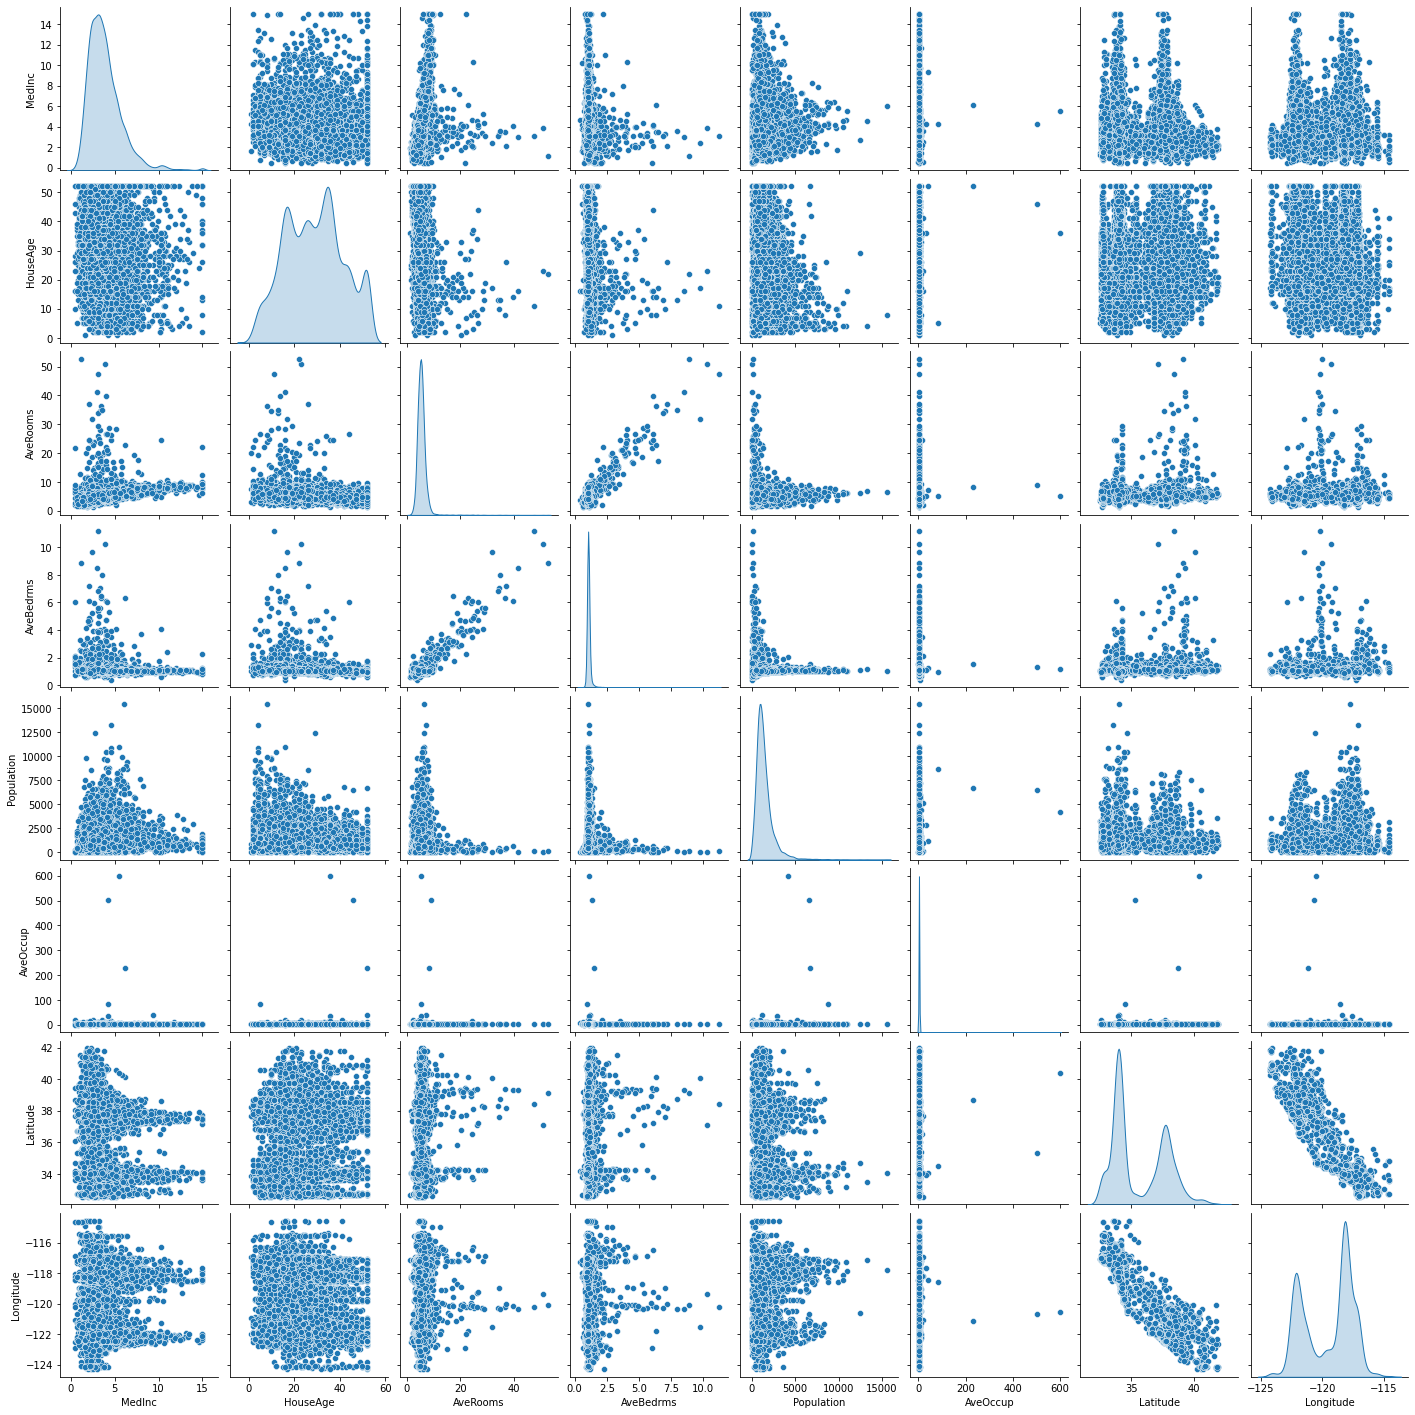

In [100]:
function_to_pair_plot_kde(df_sample)

In [101]:
def plot_heatmap(df):
    plt.figure(dpi = 120,figsize= (5,4))
    mask = np.triu(np.ones_like(df.corr(),dtype = bool))
    sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 90)
    plt.title('Correlation Heatmap')
    plt.show()

plot heatmap to ensure our inferences about correlation

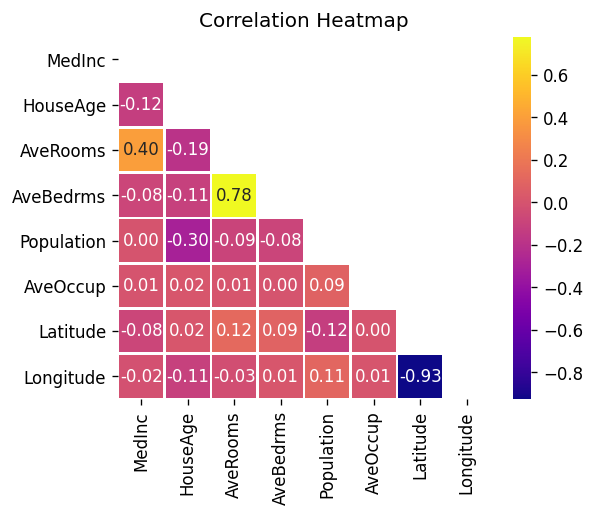

In [102]:
plot_heatmap(df_sample)

AvgOccupation are less likely to correlate (weak dependenece)
HouseAge and Population, MedInc are acceptable



We want to know the correlation between each attributes with Price

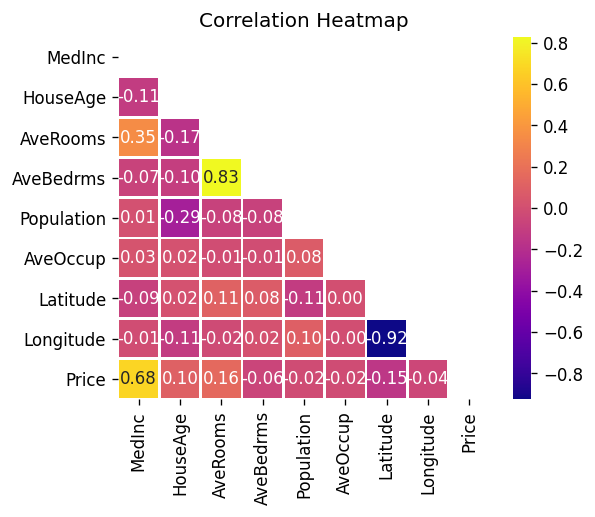

In [103]:
plot_heatmap(df_sample_full)

Median income seems to higly correlated with Price, it's supposed to be the most influential on Price



Median income with the rest 

Correlation between MedInc and HouseAge ==>  -0.10996951963083942


<Figure size 500x400 with 0 Axes>

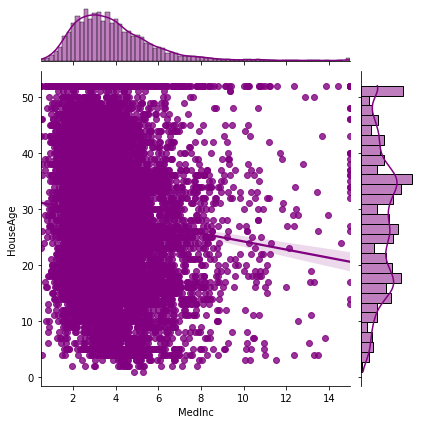

Correlation between MedInc and AveRooms ==>  0.34619040373103227


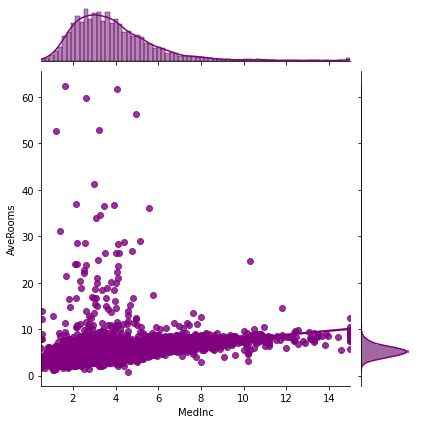

Correlation between MedInc and AveBedrms ==>  -0.07024168253701


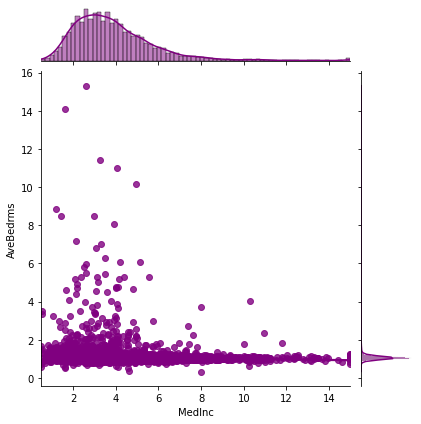

Correlation between MedInc and Population ==>  0.01115448396161475


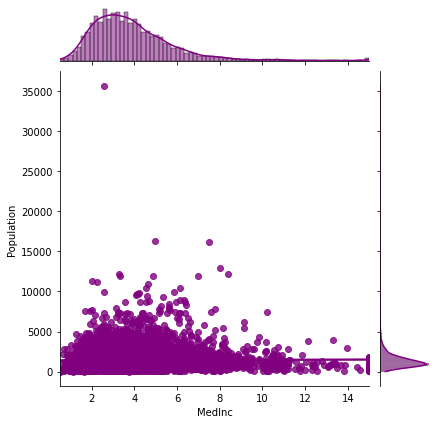

Correlation between MedInc and AveOccup ==>  0.02774760822886285


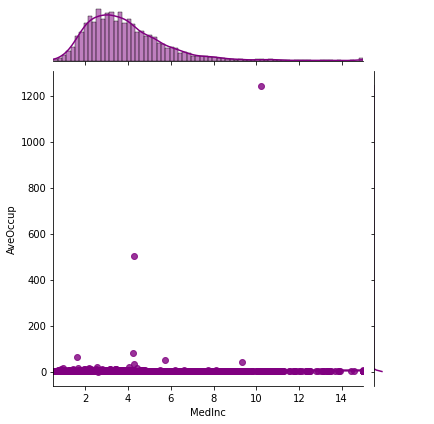

Correlation between MedInc and Latitude ==>  -0.08585966727789571


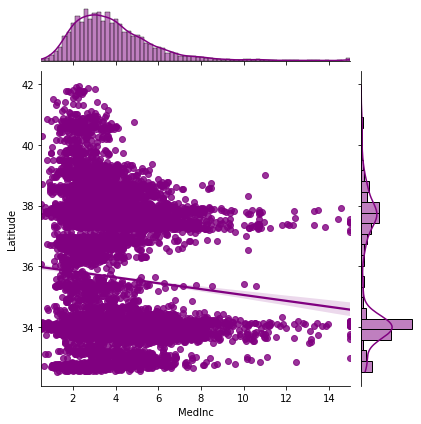

Correlation between MedInc and Longitude ==>  -0.008404818083740051


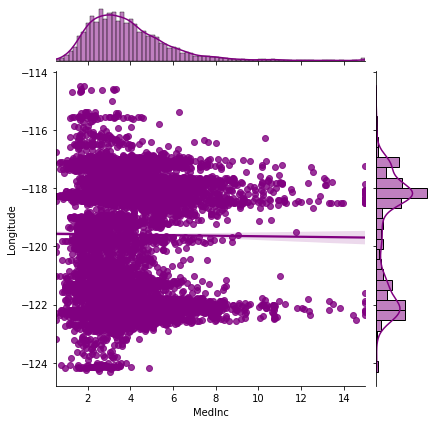

Correlation between MedInc and Price ==>  0.6834492518749513


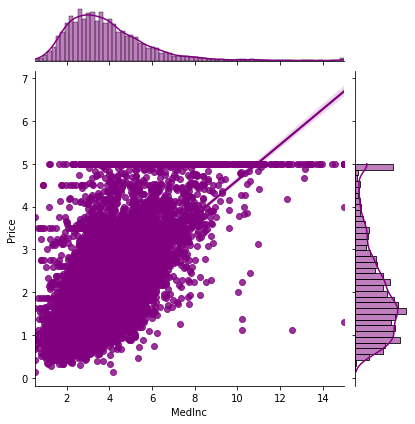

In [104]:
plt.figure(dpi = 100, figsize = (5,4))
print("Median income with the rest \n")
for i in  df_sample_full.columns:
    if i != 'MedInc':
        print(f"Correlation between MedInc and {i} ==> ",df_sample_full.corr().loc['MedInc'][i])
        sns.jointplot(x='MedInc',y=i,data=df_sample_full,kind = 'reg',color = 'purple')
        plt.show()

I still suspect on avg bedroom and avg room with Median income so it's reasonable to plot dependent line.

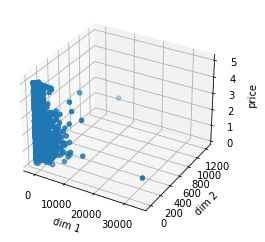

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = df_sample_full.loc[ : , df_sample_full.columns != 'Price']
y = df_sample_full.Price
pca.fit(x)

x_new = pca.transform(x)

xs = x_new[:,0]
ys = x_new[:,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=xs,ys=ys,zs=y)
ax.set_xlabel("dim 1")
ax.set_ylabel("dim 2")
ax.set_zlabel("price")
plt.show()

if we compute PCA, some outliers are detected though it's vague to find out anything new

Next we might want to remove these outliers based on pairplot above. It might help in transforming our data distribution under a normal one

In [120]:
df_sample_full = df_sample_full.drop(df_sample_full[df_sample_full.AveOccup > 1200].index,axis=0)

Correlation between MedInc and AveOccup ==>  -0.00790877162176114


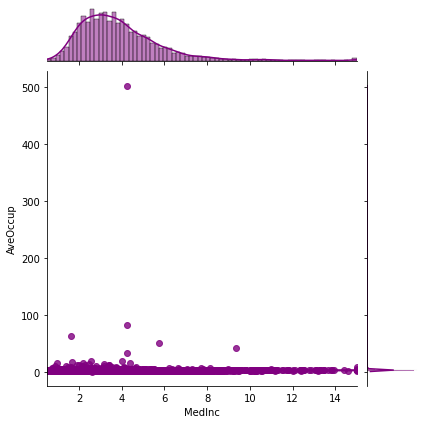

In [107]:
def draw_corr_between_two(df, attribute1, attribute2):
    print("Correlation between {} and {} ==> ".format(attribute1, attribute2),df.corr().loc[attribute1][attribute2])
    sns.jointplot(x=attribute1,y=attribute2,data=df,kind = 'reg',color = 'purple')
    plt.show()
draw_corr_between_two(df_sample_full, "MedInc", "AveOccup")

Try using natural log for MedInc.

In [121]:
import math
df_sample_full["LogMedInc"] = np.log(df_sample_full.MedInc)

In [122]:
df_sample_full.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,LogMedInc
1297,5.0164,13.0,6.581549,0.996705,1969.0,3.243822,37.98,-121.82,1.652,1.612713
6901,2.1944,33.0,4.131313,0.984848,664.0,3.353535,34.04,-118.15,2.033,0.785909
10622,6.1395,3.0,5.725222,1.175665,3068.0,2.472200,33.68,-117.82,3.580,1.814743
10999,11.0546,25.0,8.180723,1.012048,796.0,3.196787,33.76,-117.79,4.872,2.402847
3021,3.1250,36.0,6.444444,1.111111,39.0,2.166667,35.17,-119.48,0.375,1.139434


Correlation between LogMedInc and AveOccup ==>  -0.010215126396219399


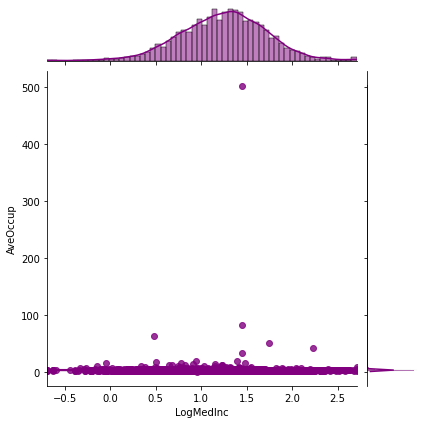

In [110]:
draw_corr_between_two(df_sample_full, "LogMedInc", "AveOccup")

It's slightly skew at left side

In [111]:
!pip install statsmodels

You should consider upgrading via the 'c:\python\python36\python.exe -m pip install --upgrade pip' command.


In [112]:
import statsmodels.api as sm
import pylab as py
import sys
import stat_util


In [113]:
def plot_qq(df, attribute):
    mean, var = stat_util.TrimmedMeanVar(df[attribute], p=0.01)
    std = math.sqrt(var)

    xs = [-4, 4]
    fxs, fys = stat_util.FitLine(xs, mean, std)
    plt.plot(fxs, fys, linewidth=4, color='grey')
    xs, ys = stat_util.NormalProbability(df[attribute])
    plt.plot(xs, ys)
    plt.show()


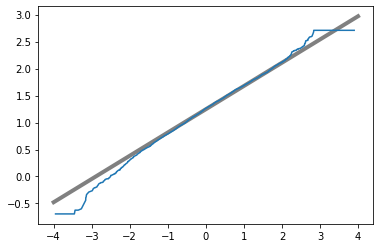

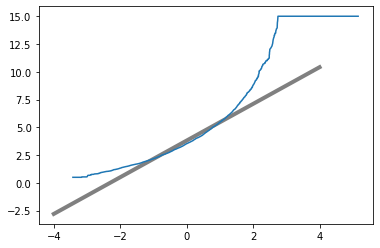

In [114]:
plot_qq(df_sample_full, 'LogMedInc')
plot_qq(df_sample_full, 'MedInc')

Let visualize qqplot for all attributes

MedInc


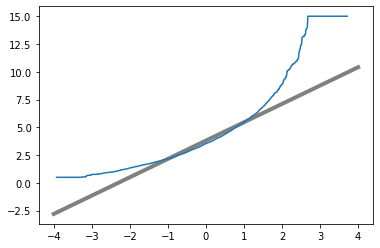

HouseAge


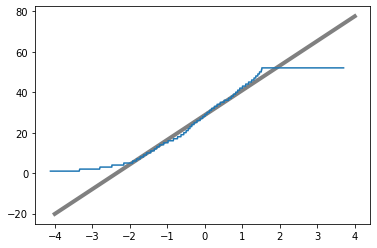

AveRooms


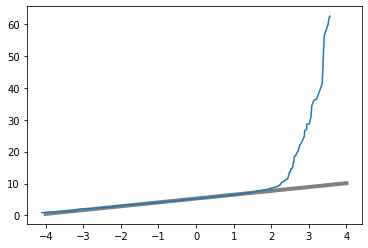

AveBedrms


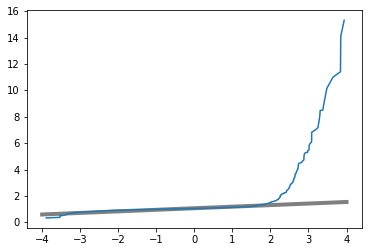

Population


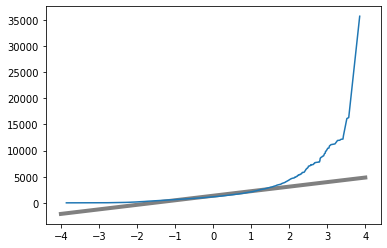

AveOccup


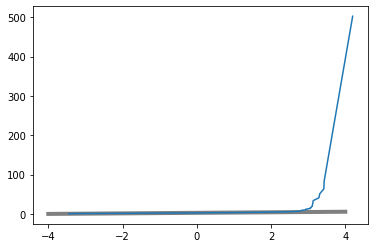

Latitude


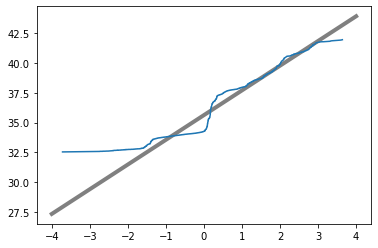

Longitude


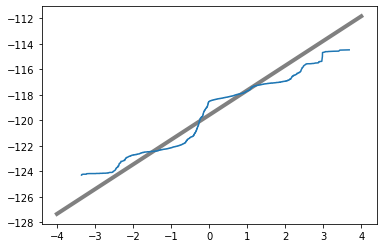

Price


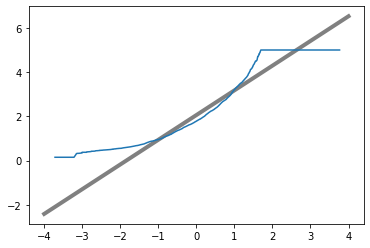

LogMedInc


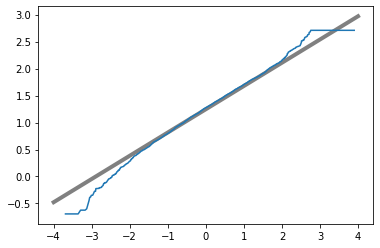

In [115]:
for attr in df_sample_full.columns:
    print(attr)
    plot_qq(df_sample_full, attr)

In [123]:
df_sample_full = df_sample_full[df_sample_full.Population < 20000]

Correlation between LogMedInc and LogPopulation ==>  0.054371717316162804


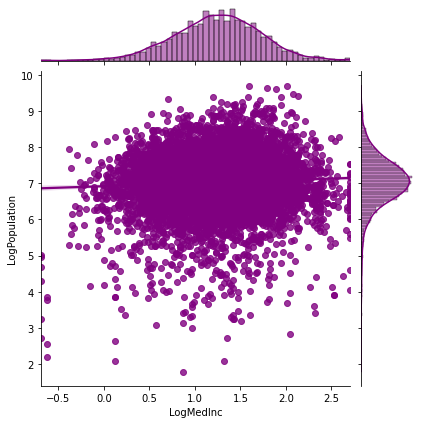

In [126]:
df_sample_full["LogPopulation"] = np.log(df_sample_full.Population)
draw_corr_between_two(df_sample_full, "LogMedInc", "LogPopulation")

Correlation between LogMedInc and Population ==>  0.05062237902094367


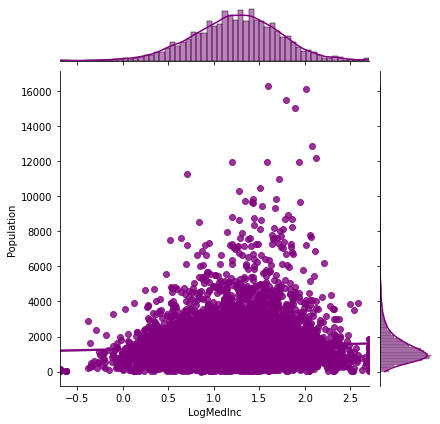

In [127]:
draw_corr_between_two(df_sample_full, "LogMedInc", "Population")

Correlation between LogMedInc and AveRooms ==>  0.36603614499811515


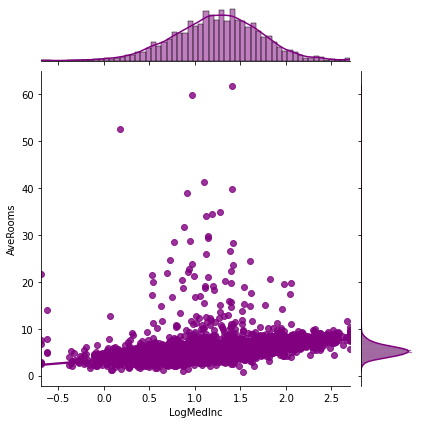

In [133]:
draw_corr_between_two(df_sample_full, "LogMedInc", "AveRooms")

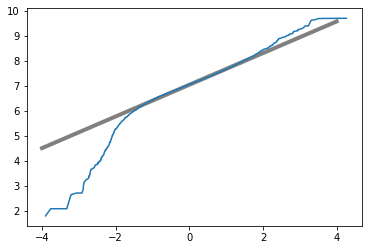

In [130]:
plot_qq(df_sample_full, "LogPopulation")

LogPopulation is likely transformed to normal distribution know but it increases the correlation with LogMedInc

To modify data well, we should make some hypothesis testing between groups (attributes). Let write some code. We perform CI, Chi2 test anf Fisher test

In [134]:
from scipy import stats


In [ ]:
def statistic_numbers(distribution):
    """
    return:
    sample mean
    standard deviation
    z-score
    """
    return np.mean(distribution), stats.zscore(distribution)